# EDA

In [232]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [188]:
df = pd.read_csv("./ACME-HappinessSurvey2020.csv")
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [189]:
# Describe the main data stats
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [190]:
# Check for any null values
df.isnull().any().any()

False

We now take a look at the graphical relationship between he individual features and the target variable.

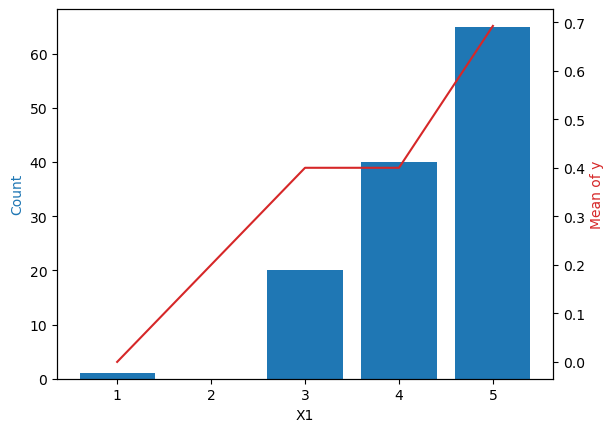

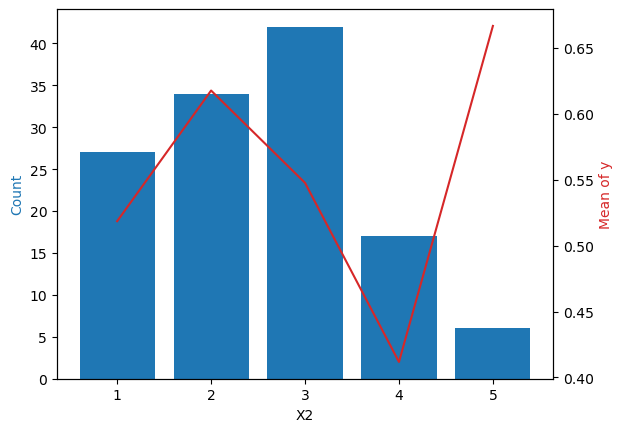

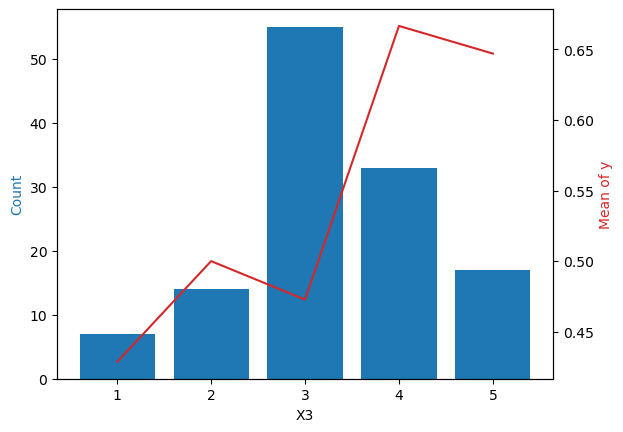

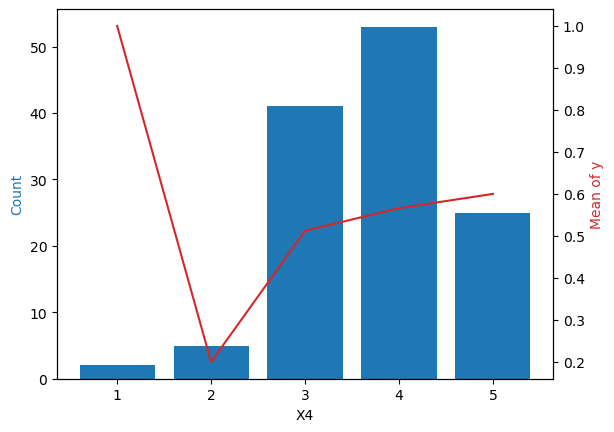

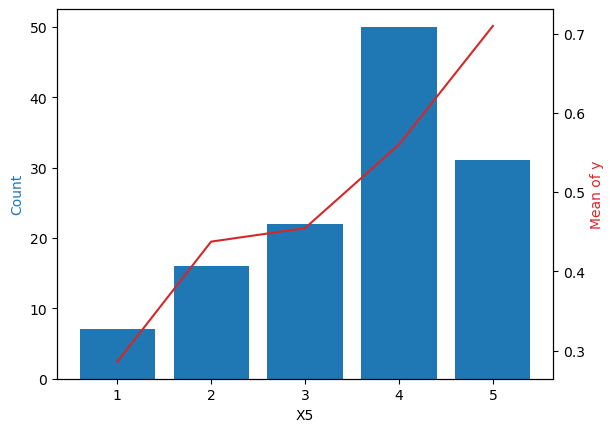

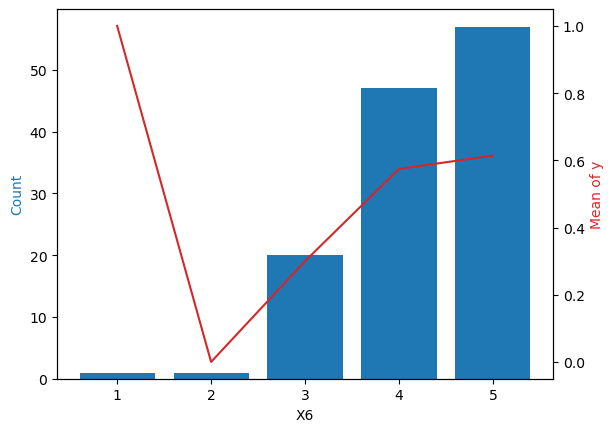

In [259]:
for i in range(1, 7):
    fig, ax = plt.subplots()
    var = f"X{i}"
    xi_avg = df.groupby(var).agg(mean_y=('Y', 'mean'), count_x=(var, 'count'))
    color = 'tab:blue'
    ax.set_xlabel(var)
    ax.set_ylabel('Count', color=color)
    ax.bar(xi_avg.index, xi_avg.count_x, color=color)
    ax2 = ax.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Mean of y', color=color)
    ax2.plot(xi_avg.index, xi_avg.mean_y, color=color)
    plt.show()

In [254]:
a = df.groupby('X1').agg(mean_y=('Y', 'mean'), count_X1=('X1', 'count'))
a.mean_y

X1
1    0.000000
3    0.400000
4    0.400000
5    0.692308
Name: mean_y, dtype: float64

Summarising the data where the review was positive and negative

In [191]:
X, y = df.drop(["Y"], axis=1), df["Y"]
X_pos = X.loc[y == 1]
X_neg = X.loc[y == 0]


In [192]:
X_pos.describe()

,X1,X2,X3,X4,X5,X6
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,4.536232,2.507246,3.449275,3.797101,3.884058,4.376812
std,0.698311,1.106441,1.022342,0.900649,1.064621,0.768908
min,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,5.000000,2.000000,3.000000,4.000000,4.000000,5.000000
75%,5.000000,3.000000,4.000000,4.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [193]:
X_neg.describe()

,X1,X2,X3,X4,X5,X6
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,4.087719,2.561404,3.140351,3.684211,3.368421,4.105263
std,0.851064,1.134170,1.007802,0.848484,1.189712,0.838455
min,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000
25%,4.000000,2.000000,3.000000,3.000000,3.000000,3.000000
50%,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Would have expected the mean vals for all of the variables to be higher for the positive reviews given the questions but `X2` is actually lower. We also note that the classes are *slightly* imbalanced, with slightly more observbations with a target = 1. While the required metric for satisfaction is accuracy, it would be worth considering others which capture the model's performance nonwithstanding the class imbalance such as AUC, F1 etc.

In [194]:
X_pos.mean() - X_neg.mean()

X1    0.448513
X2   -0.054157
X3    0.308924
X4    0.112891
X5    0.515637
X6    0.271548
dtype: float64

In [195]:
# Compute the covariance matrix to observe correlation between vars
df.corr()

,Y,X1,X2,X3,X4,X5,X6
Y,1.000000,0.280160,-0.024274,0.150838,0.064415,0.224522,0.167669
X1,0.280160,1.000000,0.059797,0.283358,0.087541,0.432772,0.411873
X2,-0.024274,0.059797,1.000000,0.184129,0.114838,0.039996,-0.062205
X3,0.150838,0.283358,0.184129,1.000000,0.302618,0.358397,0.203750
X4,0.064415,0.087541,0.114838,0.302618,1.000000,0.293115,0.215888
X5,0.224522,0.432772,0.039996,0.358397,0.293115,1.000000,0.320195
X6,0.167669,0.411873,-0.062205,0.203750,0.215888,0.320195,1.000000


From the matrix, we observe that the $X_2$ variable has little to no correlation to the target $y$, so we may consider dropping that column from the feature set to improve performance and reduce noise. We may consider the same for $X_4$. None of the variables have an excessively low variance which would indicate that they do not change that much and may not be a good predictor. Variables $X_3, X_5$ have a notable high covariance, indicating that there may be some correlation or dependence between them. In this case it may be worth experimenting with dropping the $X_3$ variable, as it has a lower correlation with the target and appears to be significantly correlated with another variable, providing noise.

In [223]:
X_prime = X.drop(['X2', 'X4'], axis=1)
X_prime.head()

,X1,X3,X5,X6
0,3,3,2,4
1,3,3,4,3
2,5,3,3,5
3,5,3,3,5
4,5,3,3,5


Splitting the data into train test split and using K Fold cross validation to examine the performance of some preliminary classification models before any hyperparameter or feature selection / tuning

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X_prime, y)
kf = KFold(n_splits=5)
models = [LogisticRegression(), RandomForestClassifier(), XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')]
for model in models:
    res = cross_val_score(model, X_train, y_train, scoring="accuracy", cv = kf)
    print(res.mean())

0.5964912280701754
0.724561403508772
0.7456140350877193


XGBoost model consistently outperforms others as a baseline on accuracy. Continuing with this model to try and refine.

In [235]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', scale_pos_weight=1, seed=27),
 param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 5, 'min_child_weight': 1}, 0.7177777777777778)

# TO DO
- Use ROC, AUC, F1, Conf Matrix to evaluate performance after proper hyperparam tuning
- Partial dependent plots on test?
- Write conclusion after achieving 73+ acc on test set